<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

## Import

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Exploring your data

### Read cleaned data from file (0.25 points)

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [3]:
# YOUR CODE HERE
cleaned_df = pd.read_csv("../data/processed/21127503_americas_processed.csv")

In [4]:
# TEST
cleaned_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
0,93763.0,48981.0,44782.0,18.184992,6.828165,11.0,20.153997,17.004881,8.655858,11.81121,...,21.149982,63.452255,70.19852,76.07276,106.128710,39.528947,95.522408,97.105964,2022,Antigua and Barbuda
1,93219.0,48708.0,44511.0,12.115000,6.365000,11.0,20.153997,17.004881,8.655858,11.81121,...,0.720000,63.452255,75.77500,80.94100,106.128710,39.528947,95.522408,97.105964,2021,Antigua and Barbuda
2,92664.0,48428.0,44236.0,12.160000,5.961000,11.0,20.153997,17.004881,8.655858,11.81121,...,0.740000,63.452255,76.06100,81.31600,106.128710,39.528947,95.522408,97.105964,2020,Antigua and Barbuda
3,92117.0,48156.0,43961.0,11.485000,5.865000,11.0,20.153997,17.004881,8.655858,11.81121,...,0.690000,63.452255,75.90900,81.17100,112.122238,39.528947,104.976669,97.105964,2019,Antigua and Barbuda
4,91626.0,47911.0,43715.0,10.816000,5.787000,11.0,20.153997,17.004881,8.655858,11.81121,...,0.700000,63.452255,75.72400,81.00000,112.091682,39.528947,104.444443,97.105964,2018,Antigua and Barbuda


In [5]:
# TEST
cleaned_df.shape

(1204, 26)

### Numerical analysis using descriptive statistics (0.25 points)

Descriptive statistics show the characteristics of numerical features. It shows us the information such as:
- The mean (and you can go further with advanced techiques as Arithmetic mean, Geometric mean, Harmonic mean)
- The median
- The mode
- Quantiles (Quartiles, Percentiles, Deciles, Crocodiles?)
- Range and IQR (Interquartile Range) (you might find that its relation to box plots)
- Variance and Standard deviation (std dev)
- Coefficient of Variation
- Skewness
- Kurtosis
- Standard Error (of the sample mean)
- Moments
- Covariance and Correlation

Due the scope of this lab, you just need to use basic function of Pandas to calculate basic descriptive statistics information and give insights from it.

In [6]:
df_copy = cleaned_df.drop(['Year', 'Country'], axis='columns')

# YOUR CODE HERE

pd.set_option('display.max_columns', None)
df_copy.describe()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),Unemployment(%),GDP in USD,National Income per Capita,Net income from Abroad,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate
count,1.204000e+03,1.204000e+03,1.204000e+03,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1.204000e+03,1204.000000,1.204000e+03,1.204000e+03,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000
mean,2.126095e+07,1.075849e+07,1.050246e+07,18.184992,6.828165,10.879921,20.153997,17.004881,8.655858,11.811210,8.449662,5.000622e+11,1.521022,-6.977767e+08,9.465944e+09,2620.246216,21.149982,63.452255,70.198520,76.072760,106.128710,39.528947,95.522408,97.105964
std,5.505953e+07,2.791240e+07,2.714762e+07,5.728701,1.721987,2.510386,3.128110,10.185105,7.958425,3.870891,3.939607,2.371939e+12,4.123716,2.683293e+10,2.610442e+10,2439.693577,19.897091,17.863313,4.207327,4.345992,7.355744,16.324976,8.274955,1.669140
min,1.510100e+04,7.336000e+03,7.765000e+03,5.900000,2.800000,6.000000,10.386770,1.128129,0.094002,3.099745,1.200000,2.745222e+08,-25.597061,-6.823150e+10,3.486034e+05,23.915832,0.000000,0.000000,45.758000,46.251000,72.597130,0.117370,46.638149,72.346718
25%,1.091660e+05,5.645700e+04,5.554250e+04,13.767000,5.590250,9.000000,18.713608,10.670777,3.891058,9.503683,5.946500,2.984479e+09,1.521022,-1.793428e+09,1.035674e+08,1868.859189,5.245000,63.452255,68.190750,74.094250,102.377203,37.783577,95.522408,97.105964
50%,3.422497e+06,1.764235e+06,1.658096e+06,17.602500,6.828165,11.000000,20.153997,17.004881,8.310724,11.811210,8.449662,1.505472e+10,1.521022,-6.977767e+08,1.505479e+09,2620.246216,16.665000,63.452255,70.198520,76.225000,106.128710,39.528947,95.522408,97.105964
75%,1.194908e+07,5.975354e+06,5.995499e+06,22.027250,7.836750,12.000000,21.871533,19.691680,8.655858,12.415630,9.877500,9.840756e+10,1.685462,-7.408989e+07,9.465944e+09,2620.246216,31.440000,69.753488,72.992500,78.855500,109.840109,39.528947,97.884462,97.105964
max,3.332876e+08,1.682662e+08,1.650213e+08,37.349000,17.738000,17.000000,32.266680,52.982150,42.189880,27.820870,22.210000,2.546270e+13,55.972006,2.929490e+11,2.237237e+11,17264.736744,86.990000,99.929949,80.621000,85.855000,148.712952,117.719940,152.806656,100.000000


**TODO**: Give your obervation here

The number of non-null values (count) in all columns is 1204, which means the missing value problem has been solved

There is a significant difference between the mean and median in the **Total Population** column (21,260,950 vs 3,422,497) and a huge gap between the min value and the max value of total population (15,101 vs 333,287,600), which can be stated that there a major deviation (55,059,530) in the total population of countries in Americas and same with the **GDP in USD** column

### Describe the correlation between features in the dataset (0.75 points)

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal. By using calculation and visualisation, Python allows us to create a correlation matrix, which is a table that represents the correlation coefficients between different variables.

Now let's make a correlation matrix, then visualize it, and describe what insights you observed?

In [7]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION) 

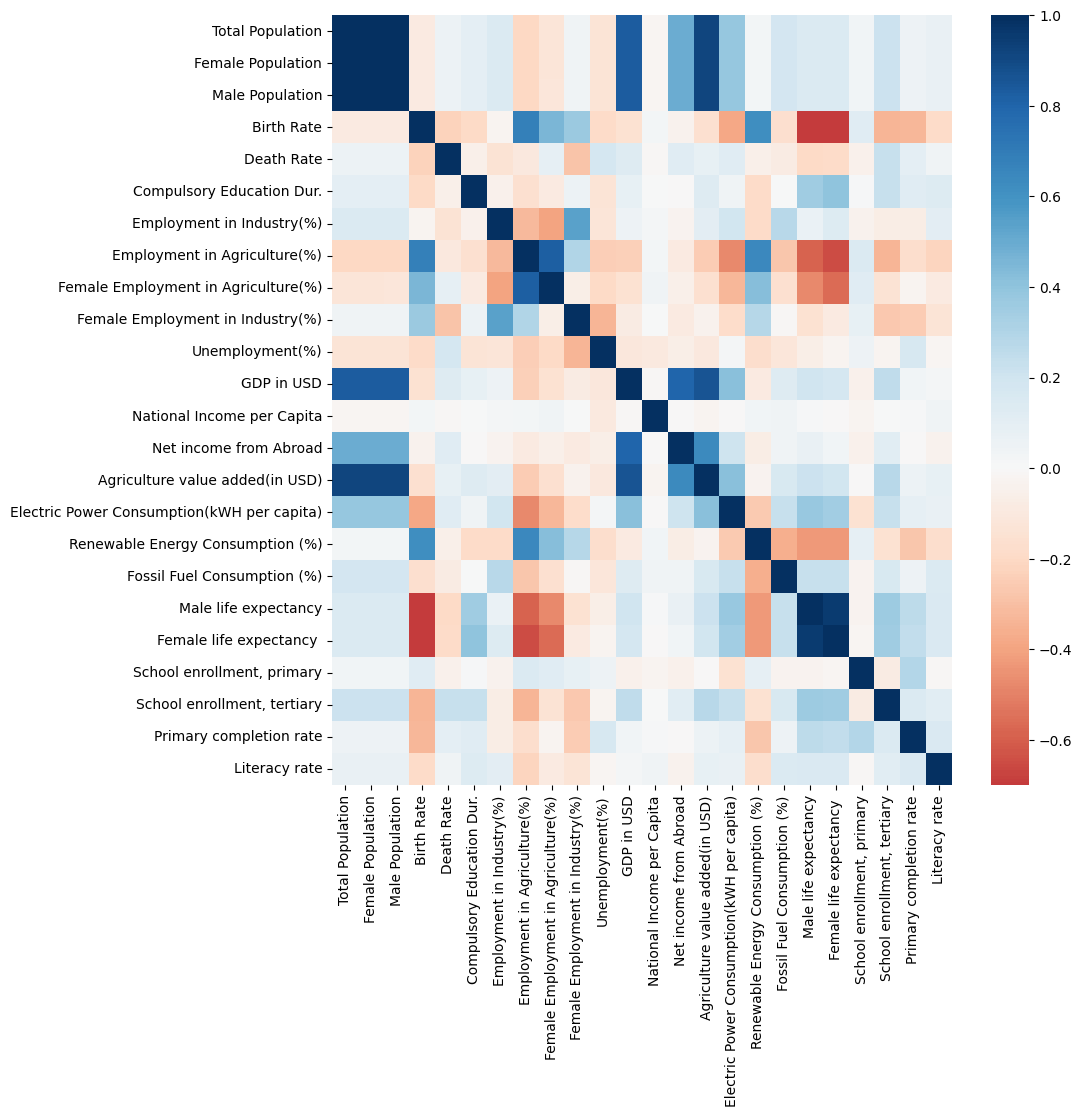

In [8]:
# YOUR CODE HERE
# create a copy
df_copy = cleaned_df.copy()

# Exclude the categorical features from the matrix
df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

**Question 01**: How does the correlation between features change in the top 10 countries with the LARGEST population?

When we have an answer for this question, we might see how features interaction with each other when the country population is large.

In [9]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION)

countries_df = {}

for unique_value in cleaned_df["Country"].unique():
    filtered_df = cleaned_df[cleaned_df["Country"] == unique_value]
    
    countries_df[unique_value] = filtered_df
    
max_population_df = {'max_population': [],
                    'country': []}
    
for key, value in countries_df.items():
    max_population_df['country'].append(key)    
    max_population_df['max_population'].append(value.describe()["Total Population"]['max'])
   
max_population_df = pd.DataFrame(max_population_df)
max_population_df

,max_population,country
0,93763.0,Antigua and Barbuda
1,46234830.0,Argentina
2,106585.0,Aruba
3,409984.0,"Bahamas, The"
4,281635.0,Barbados
5,405272.0,Belize
6,65636.0,Bermuda
7,12224110.0,Bolivia
8,215313498.0,Brazil
9,31305.0,British Virgin Islands


In [10]:
top10_max_population_df = max_population_df.nlargest(10, "max_population")
top10_max_population_df

,max_population,country
39,333287557.0,United States
8,215313498.0,Brazil
27,127504125.0,Mexico
13,51874024.0,Colombia
1,46234830.0,Argentina
10,38929902.0,Canada
31,34049588.0,Peru
41,30741464.0,"Venezuela, RB"
12,19603733.0,Chile
18,18001000.0,Ecuador


In [11]:
top10_max_country = top10_max_population_df["country"].tolist()
top10_max_df = cleaned_df[cleaned_df["Country"].isin(top10_max_country)]
top10_max_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),Unemployment(%),GDP in USD,National Income per Capita,Net income from Abroad,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
28,46234830.0,23345532.0,22889298.0,18.184992,6.828165,14.0,20.153997,17.004881,8.655858,11.811210,6.491,6.327703e+11,1.521022,-1.132795e+10,4.077679e+10,2620.246216,21.149982,63.452255,70.19852,76.07276,106.128710,39.528947,95.522408,97.105964,2022,Argentina
29,45808747.0,23130548.0,22678199.0,13.902000,8.955000,14.0,19.950240,7.652854,3.658348,8.571828,8.740,4.872271e+11,1.521022,-9.815440e+09,3.474680e+10,2620.246216,21.149982,63.452255,72.18200,78.64700,110.156113,107.130661,105.479530,97.105964,2021,Argentina
30,45376763.0,22911069.0,22465694.0,14.125000,8.509000,14.0,20.457020,7.686438,3.685107,9.711953,11.460,3.855404e+11,-8.109027,-1.000444e+10,2.362772e+10,2620.246216,9.840000,63.452255,72.54600,79.28500,110.617813,99.266228,103.837791,97.105964,2020,Argentina
31,44938712.0,22689693.0,22249019.0,14.783000,7.600000,14.0,20.159010,7.740676,3.518730,9.009121,9.840,4.477547e+11,-5.184596,-1.758789e+10,2.381408e+10,2620.246216,10.740000,63.452255,73.85700,80.68100,111.365318,95.077553,100.382896,97.105964,2019,Argentina
32,44494502.0,22467488.0,22027014.0,15.187000,7.680000,14.0,20.213640,7.832407,3.544435,8.916409,9.220,5.248199e+11,-6.558501,-1.872585e+10,2.381569e+10,2620.246216,10.520000,63.452255,73.63100,80.32900,111.545609,90.972832,100.281807,97.105964,2018,Argentina


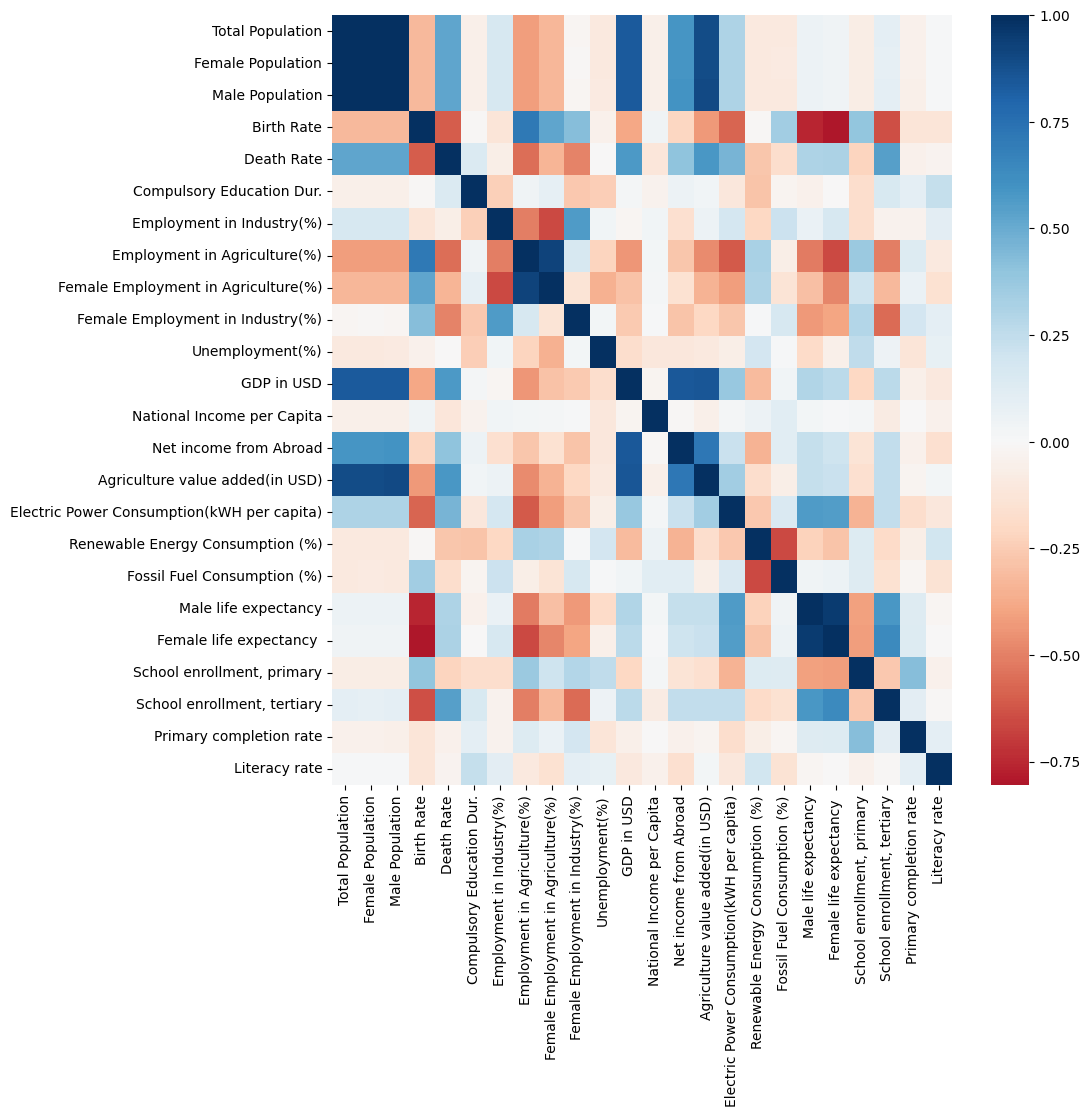

In [12]:
# YOUR CODE HERE
top10_max_df_copy = top10_max_df.copy()
top10_max_df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(top10_max_df_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

**YOUR ANSWER**

The heatmap tends to display darker colors, implying that the features within the top 10 countries with the largest population become more strongly correlated with each other

**Question 02**: How does the correlation between features change in the top 10 countries with the SMALLEST population?

When we have an answer for this question, we might see how features interaction with each other when the country population is small.

In [13]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION)
min_population_df = {'min_population': [],
                    'country': []}
    
for key, value in countries_df.items():
    min_population_df['country'].append(key)    
    min_population_df['min_population'].append(value.describe()["Total Population"]['min'])
   
min_population_df = pd.DataFrame(min_population_df)

top10_min_population_df = min_population_df.nsmallest(10, "min_population")

top10_min_country = top10_min_population_df["country"].tolist()
top10_min_df = cleaned_df[cleaned_df["Country"].isin(top10_min_country)]
top10_min_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),Unemployment(%),GDP in USD,National Income per Capita,Net income from Abroad,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
0,93763.0,48981.0,44782.0,18.184992,6.828165,11.0,20.153997,17.004881,8.655858,11.81121,8.449662,1.757604e+09,1.521022,-5.804818e+07,3.264444e+07,2620.246216,21.149982,63.452255,70.19852,76.07276,106.128710,39.528947,95.522408,97.105964,2022,Antigua and Barbuda
1,93219.0,48708.0,44511.0,12.115000,6.365000,11.0,20.153997,17.004881,8.655858,11.81121,8.449662,1.560519e+09,1.521022,-6.324747e+07,3.097037e+07,2620.246216,0.720000,63.452255,75.77500,80.94100,106.128710,39.528947,95.522408,97.105964,2021,Antigua and Barbuda
2,92664.0,48428.0,44236.0,12.160000,5.961000,11.0,20.153997,17.004881,8.655858,11.81121,8.449662,1.416348e+09,1.521022,-1.997002e+07,3.034074e+07,2620.246216,0.740000,63.452255,76.06100,81.31600,106.128710,39.528947,95.522408,97.105964,2020,Antigua and Barbuda
3,92117.0,48156.0,43961.0,11.485000,5.865000,11.0,20.153997,17.004881,8.655858,11.81121,8.449662,1.675404e+09,1.521022,-8.027231e+07,2.925185e+07,2620.246216,0.690000,63.452255,75.90900,81.17100,112.122238,39.528947,104.976669,97.105964,2019,Antigua and Barbuda
4,91626.0,47911.0,43715.0,10.816000,5.787000,11.0,20.153997,17.004881,8.655858,11.81121,8.449662,1.604770e+09,1.521022,-8.022693e+07,2.787778e+07,2620.246216,0.700000,63.452255,75.72400,81.00000,112.091682,39.528947,104.444443,97.105964,2018,Antigua and Barbuda


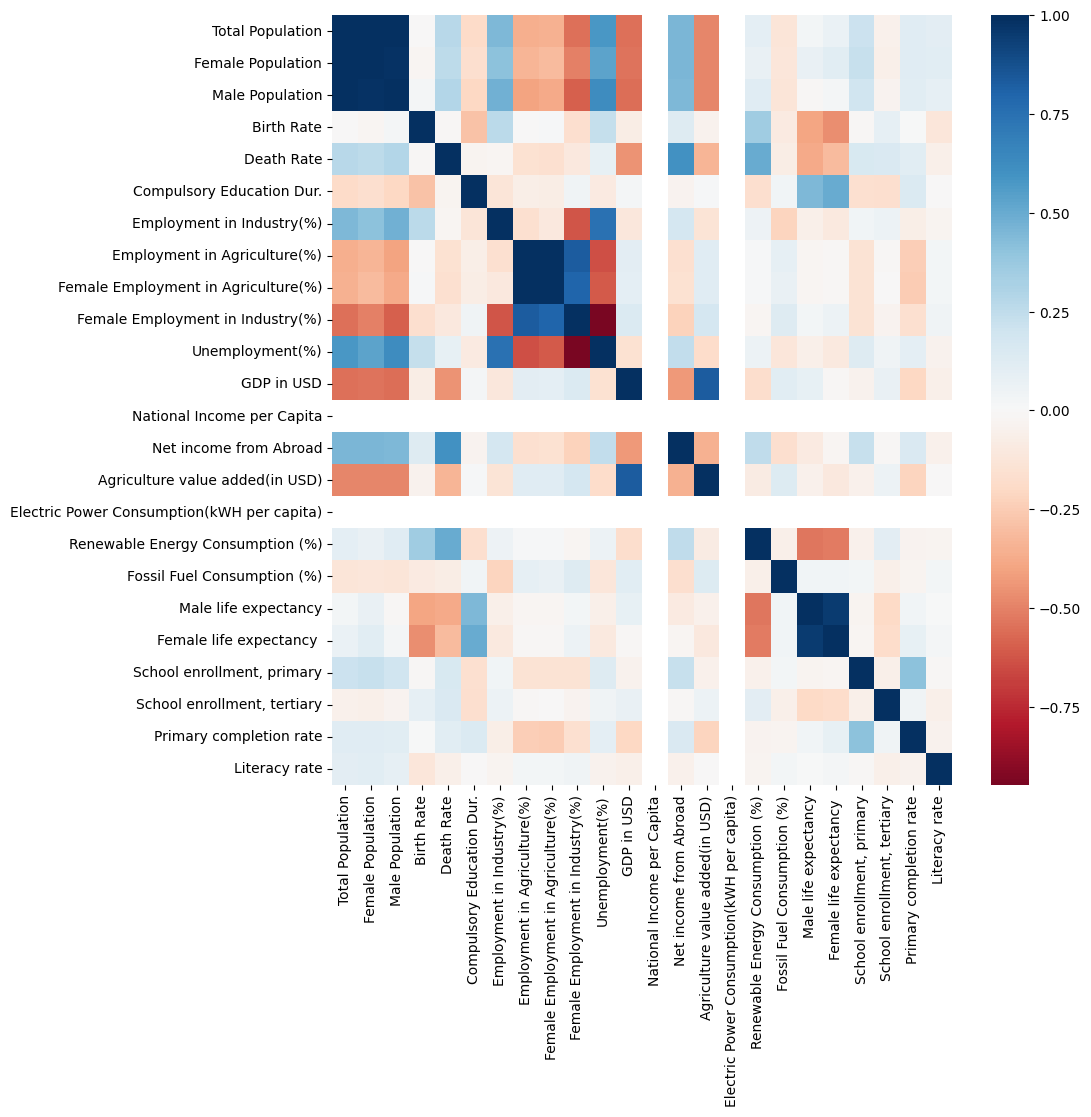

In [14]:
# YOUR CODE HERE
top10_min_df_copy = top10_min_df.copy()
top10_min_df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(top10_min_df_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

**YOUR ANSWER**

We can clearly see a significant difference in color between the heatmap of the top 10 countries with the smallest population and the overall heatmap, as well as the heatmap of the top 10 countries with the largest population. The heatmap of the top 10 countries with the smallest population has lighter colors compared to the overall heatmap and is notably much lighter compared to the heatmap of the top 10 countries with the largest population.

The correlation of some features in the top 10 countries with the smallest population and the top 10 countries with the largest population is contrasting. For example, the correlation between **Female Employment in Industry** and **Unemployment** is very strong in the top 10 countries with the smallest population, but there doesn't appear to be any correlation in the heatmap of the top 10 countries with the largest population. Conversely, **Renewable Energy Consumption** and **Fossil Fuel Consumption** seem to have little correlation in the heatmap of the top 10 countries with the smallest population, but they exhibit a fairly strong correlation in the top 10 countries with the largest population

In addition, in the top 10 countries with the smallest population, the columns **National Income per Capita** and **Electric Power Consumption (kWh per capita)** appear to have only one value each. It can be predicted that missing values for these two columns are primarily found in countries with the smallest population and have been filled in the preprocessing phase

## Making a question? (1.25 points)

After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

**A possible question is:** What is the population situation of the countries on the continent today?

**Answering this question will** help us to see the current population status and predictions about the future development of the labor force of the countries on the continent are under consideration.

**How we answer this question**: we will consider the Average Birth Rate and Death Rate for countries across all the year.

### Pre-processing

In [15]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

Step 01: construct Average Birth Rate dataframe for each country.

In [16]:
# Create a new dataframe
avg_birthrate_df = pd.DataFrame()

# YOUR CODE HERE

# Find average for each country
avg_birthrate_df["Avg.Birth Rate"] = cleaned_df.groupby("Country")["Birth Rate"].mean()

# Set the index as a column - countries
avg_birthrate_df["Country"] = avg_birthrate_df.index

# Drop the index
avg_birthrate_df.reset_index(drop=True, inplace=True)

# Sort the rows based of Average Birth Rate
avg_birthrate_df.sort_values("Avg.Birth Rate", inplace=True, ascending=False)

# Display
avg_birthrate_df.head()

,Avg.Birth Rate,Country
22,28.940357,Guatemala
24,27.961714,Haiti
25,27.421750,Honduras
7,26.289464,Bolivia
5,24.881107,Belize


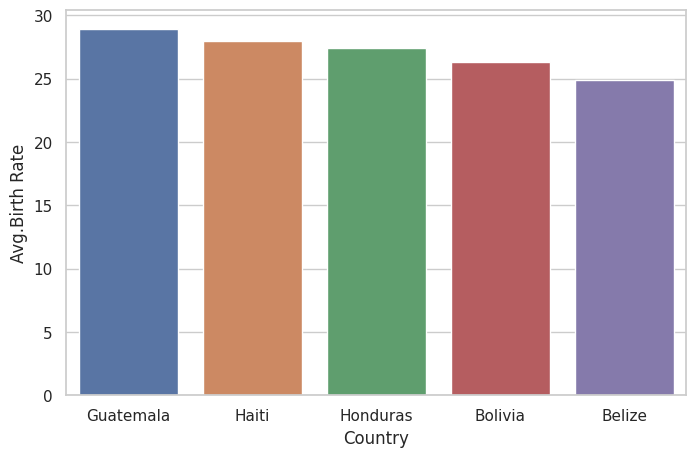

In [17]:
# Plotting for top countries
# YOUR CODE HERE
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_birthrate_df.head(), x="Country", y= "Avg.Birth Rate")

Step 02: construct Average Death Rate dataframe for each country.

In [18]:
# Create a new dataframe
avg_deathrate_df = pd.DataFrame()

# YOUR CODE HERE

# Find average for each country
avg_deathrate_df ["Avg.Death Rate"] = cleaned_df.groupby("Country")["Death Rate"].mean()

# Set the index as a column - countries
avg_deathrate_df["Country"] = avg_deathrate_df .index

# Drop the index
avg_deathrate_df .reset_index(drop=True, inplace=True)

# Sort the rows based of Average Birth Rate
avg_deathrate_df .sort_values("Avg.Death Rate", inplace=True, ascending=False)

# Display
avg_deathrate_df .head()

,Avg.Death Rate,Country
16,10.081113,Dominica
24,9.555292,Haiti
40,9.377899,Uruguay
33,9.339327,St. Kitts and Nevis
4,9.075256,Barbados


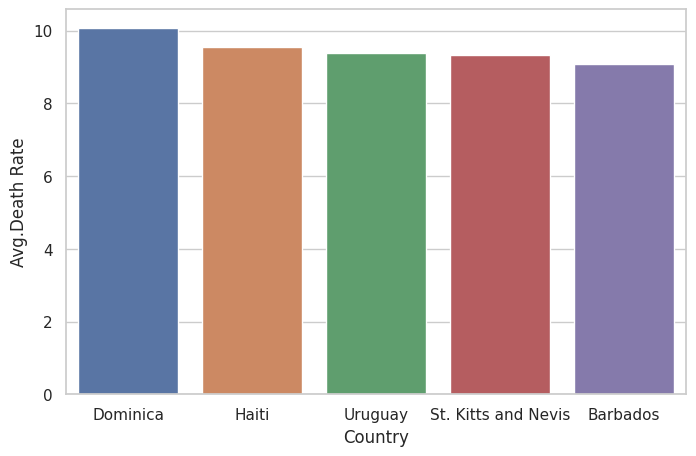

In [19]:
# Plotting for top countries
# YOUR CODE HERE
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_deathrate_df.head(), x="Country", y= "Avg.Death Rate")

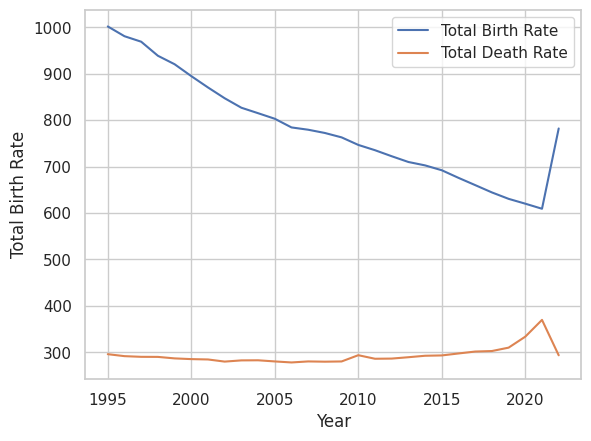

In [20]:
total_birthrate_df = pd.DataFrame()
total_deathrate_df = pd.DataFrame()

total_birthrate_df["Total Birth Rate"] = cleaned_df.groupby("Year")["Birth Rate"].sum()
total_deathrate_df["Total Death Rate"] = cleaned_df.groupby("Year")["Death Rate"].sum()


total_birthrate_df = total_birthrate_df.reset_index()
total_deathrate_df = total_deathrate_df.reset_index()

sns.lineplot(x=total_birthrate_df["Year"], y=total_birthrate_df["Total Birth Rate"], label="Total Birth Rate")
sns.lineplot(x=total_deathrate_df["Year"], y=total_deathrate_df["Total Death Rate"], label="Total Death Rate")

plt.legend()

plt.show()

In [21]:
top10_max_birthrate_df = pd.DataFrame()
top10_min_birthrate_df = pd.DataFrame()

top10_max_birthrate_df["Total Birth Rate"] = top10_max_df.groupby("Year")["Birth Rate"].sum()
top10_min_birthrate_df["Total Birth Rate"] = top10_min_df.groupby("Year")["Birth Rate"].sum()

top10_max_birthrate_df = top10_max_birthrate_df.reset_index()
top10_min_birthrate_df = top10_min_birthrate_df.reset_index()

top10_max_deathrate_df = pd.DataFrame()
top10_min_deathrate_df = pd.DataFrame()

top10_max_deathrate_df["Total Death Rate"] = top10_max_df.groupby("Year")["Death Rate"].sum()
top10_min_deathrate_df["Total Death Rate"] = top10_min_df.groupby("Year")["Death Rate"].sum()

top10_max_deathrate_df = top10_max_deathrate_df.reset_index()
top10_min_deathrate_df = top10_min_deathrate_df.reset_index()

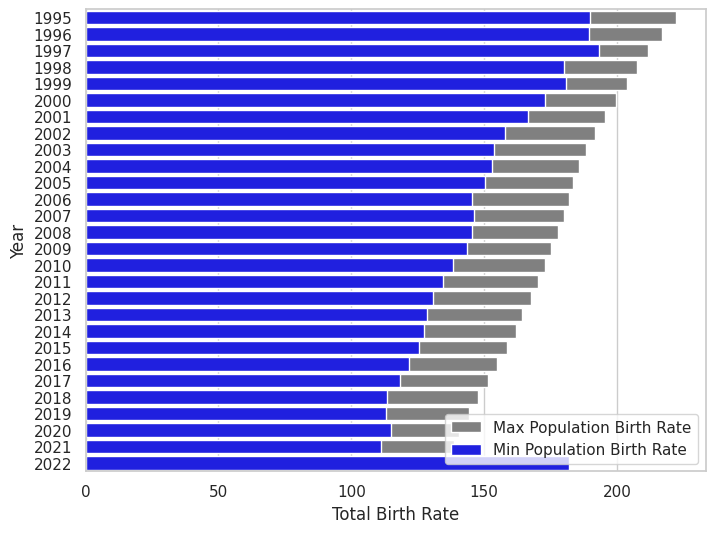

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(y=top10_max_birthrate_df["Year"], x=top10_max_birthrate_df["Total Birth Rate"], color='grey', label='Max Population Birth Rate', orient='h')
sns.barplot(y=top10_min_birthrate_df["Year"], x=top10_min_birthrate_df["Total Birth Rate"], color='blue', label='Min Population Birth Rate', orient='h')

plt.legend()

plt.show()

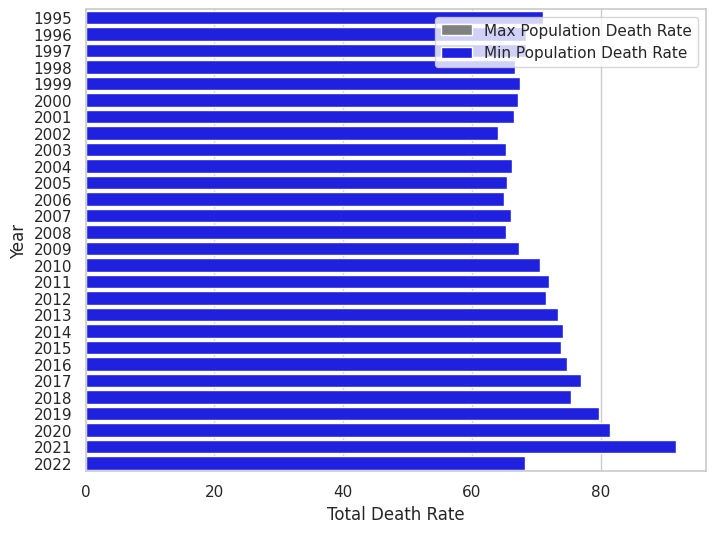

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(y=top10_max_deathrate_df["Year"], x=top10_max_deathrate_df["Total Death Rate"], color='grey', label='Max Population Death Rate', orient='h')
sns.barplot(y=top10_min_deathrate_df["Year"], x=top10_min_deathrate_df["Total Death Rate"], color='blue', label='Min Population Death Rate', orient='h')

plt.legend()

plt.show()

**TODO**: Give your obervation here

Regardless of whether the total population is low or high, you can observe a similar trend in the birth rate and death rate of countries in the Americas

The trends of the birth rate and death rate experienced a sudden change in the period of 2020 - 2021. Prior to this milestone, the birth rate was decreasing significantly while the death rate remained relatively stable. However, from 2020 onwards, the birth rate started to increase again, and the death rate also exhibited an upward trend during the 2020 - 2021 period due to the COVID-19 pandemic

## Making your own question 01? (1.5 points)

**YOUR ANSWER HERE**

As observed in the correlation matrix above, one of the features strongly correlated with Total Population is GDP in USD. How has the GDP in USD of the countries in the Americas been in recent years and its correlation with Total Population?

### Pre-processing

In [24]:
# YOUR CODE HERE (OPTION)

### Analyzing to get the answer

In [25]:
# YOUR CODE HERE
sum_gdp = pd.DataFrame()

sum_gdp = cleaned_df.groupby("Country")["GDP in USD"].sum().reset_index()

top_large_gdp = sum_gdp.nlargest(10, 'GDP in USD')
top_small_gdp = sum_gdp.nsmallest(10, 'GDP in USD')

print(top_large_gdp)
print(top_small_gdp)

top_large_gdp = cleaned_df[cleaned_df["Country"].isin(top_large_gdp["Country"])]
top_small_gdp = cleaned_df[cleaned_df["Country"].isin(top_small_gdp["Country"])]

                   Country    GDP in USD
39           United States  4.184243e+14
8                   Brazil  4.039485e+13
10                  Canada  3.714246e+13
27                  Mexico  2.676950e+13
9   British Virgin Islands  1.400174e+13
1                Argentina  1.061388e+13
41           Venezuela, RB  8.102022e+12
13                Colombia  6.210828e+12
11          Cayman Islands  6.077815e+12
12                   Chile  5.076831e+12
                           Country    GDP in USD
16                        Dominica  1.234020e+10
35  St. Vincent and the Grenadines  1.821023e+10
33             St. Kitts and Nevis  1.976702e+10
21                         Grenada  2.164097e+10
0              Antigua and Barbuda  3.186818e+10
34                       St. Lucia  3.866690e+10
5                           Belize  4.728508e+10
36                        Suriname  7.859688e+10
23                          Guyana  9.112507e+10
4                         Barbados  1.139694e+11


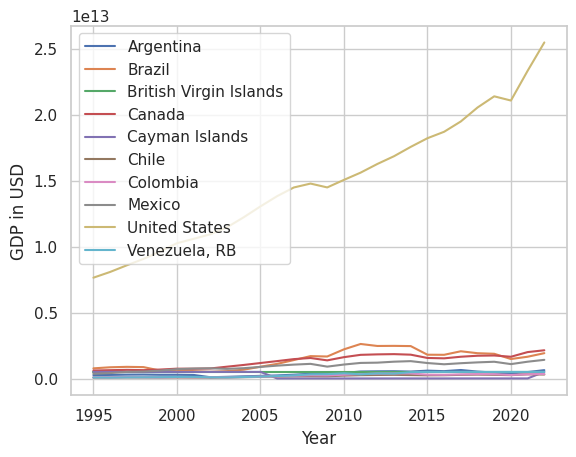

In [26]:
for country in top_large_gdp["Country"].unique():
    country_df = top_large_gdp[top_large_gdp["Country"] == country]
    sns.lineplot(x=country_df["Year"], y=country_df["GDP in USD"], label=country)
    
plt.legend()

plt.show()

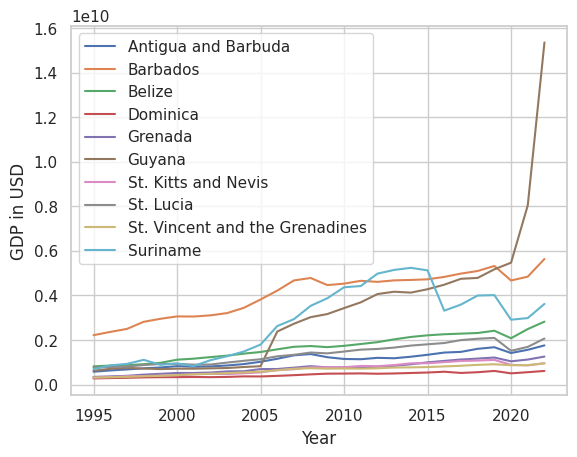

In [27]:
for country in top_small_gdp["Country"].unique():
    country_df = top_small_gdp[top_small_gdp["Country"] == country]
    sns.lineplot(x=country_df["Year"], y=country_df["GDP in USD"], label=country)
    
plt.legend()

plt.show()

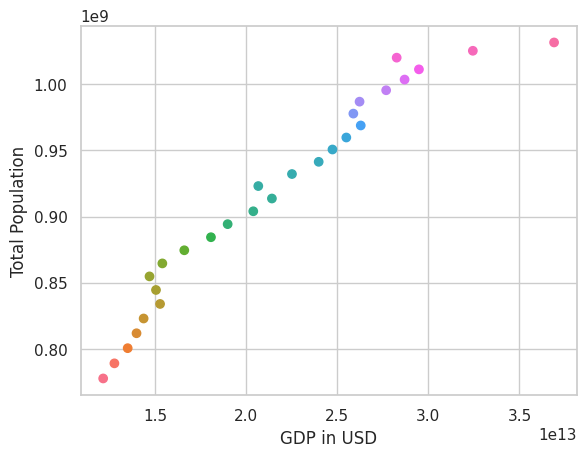

In [28]:
year_total_population = cleaned_df.groupby('Year')["Total Population"].sum().reset_index()
year_total_gdp = cleaned_df.groupby('Year')["GDP in USD"].sum().reset_index()

years = year_total_gdp["Year"]

n = len(years)
random_colors = sns.color_palette("husl", n)

years = years.tolist()

colors = []
labels = []

for id, year in enumerate(years):
    colors.append(random_colors[years.index(year)])
    labels.append(year)

plt.scatter(x=year_total_gdp['GDP in USD'], y=year_total_population['Total Population'], color=colors, label=years)

plt.xlabel('GDP in USD')
plt.ylabel('Total Population')

plt.show()

It can be seen that the GDP of the United States is significantly higher than that of other countries in the same continent, the Americas. During the periods of 2008-2010 and 2019-2020, the GDP of these countries all experienced a decline due to the 2008 economic crisis and the COVID-19 pandemic in 2019, followed by a recovery after the post-pandemic economic reopening

We can see from the scatter plot, the data closely approximates an upward-sloping line indicates a positive correlation between GDP in USD and Total Population

## Making your own question 02? (1.5 points)

**YOUR ANSWER HERE**

In addition to GDP in USD, Agriculture value added (in USD) is also a column that is strongly correlated with Total Population. So, how does Agriculture value added (in USD) contribute to Total Population?.

### Pre-processing

In [29]:
# YOUR CODE HERE (OPTION) 
sum_agrivalue = pd.DataFrame()

sum_agrivalue = cleaned_df.groupby("Country")["Agriculture value added(in USD)"].sum().reset_index()

top_large_agrivalue = sum_agrivalue.nlargest(10, 'Agriculture value added(in USD)')
top_small_agrivalue = sum_agrivalue.nsmallest(10, 'Agriculture value added(in USD)')

print(top_large_agrivalue)
print(top_small_agrivalue)

top_large_agrivalue = cleaned_df[cleaned_df["Country"].isin(top_large_agrivalue["Country"])]
top_small_agrivalue = cleaned_df[cleaned_df["Country"].isin(top_small_agrivalue["Country"])]

                   Country  Agriculture value added(in USD)
39           United States                     4.025151e+12
8                   Brazil                     1.939027e+12
27                  Mexico                     9.188273e+11
1                Argentina                     6.462461e+11
10                  Canada                     5.937632e+11
13                Colombia                     4.449377e+11
41           Venezuela, RB                     2.675730e+11
9   British Virgin Islands                     2.650464e+11
42   Virgin Islands (U.S.)                     2.650464e+11
31                    Peru                     2.547063e+11
                           Country  Agriculture value added(in USD)
33             St. Kitts and Nevis                     2.580401e+08
0              Antigua and Barbuda                     5.535519e+08
21                         Grenada                     1.100561e+09
35  St. Vincent and the Grenadines                     1.196630e+09


### Analyzing to get the answer

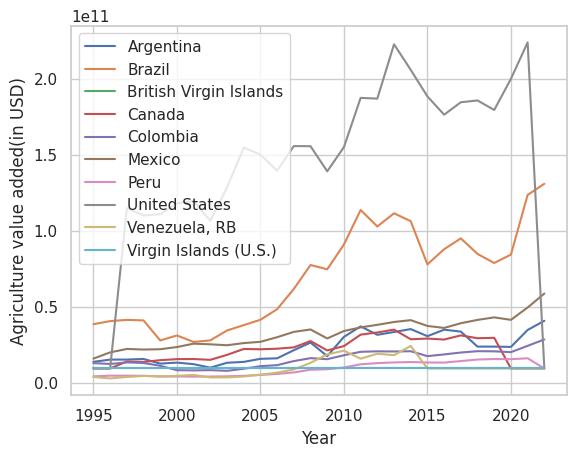

In [30]:
# YOUR CODE HERE
for country in top_large_agrivalue["Country"].unique():
    country_df = top_large_agrivalue[top_large_agrivalue["Country"] == country]
    sns.lineplot(x=country_df["Year"], y=country_df["Agriculture value added(in USD)"], label=country)
    
plt.legend()

plt.show()

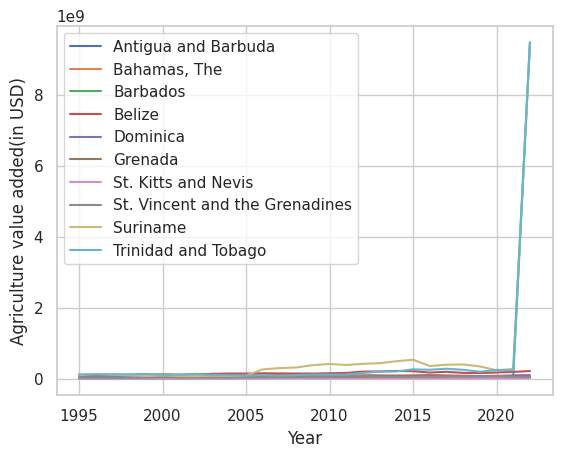

In [31]:
for country in top_small_agrivalue["Country"].unique():
    country_df = top_small_agrivalue[top_small_agrivalue["Country"] == country]
    sns.lineplot(x=country_df["Year"], y=country_df["Agriculture value added(in USD)"], label=country)
    
plt.legend()

plt.show()

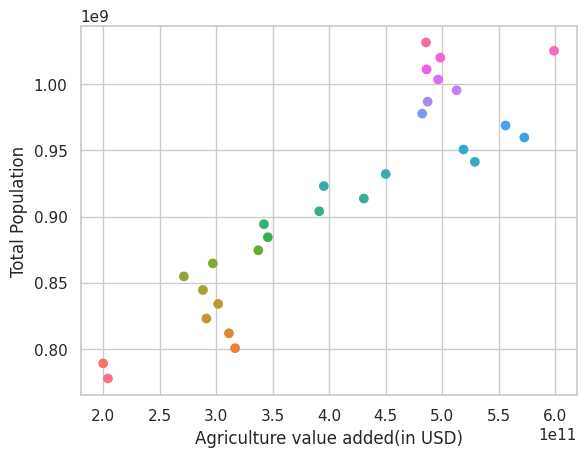

In [32]:
year_total_population = cleaned_df.groupby('Year')["Total Population"].sum().reset_index()
year_total_agrivalue = cleaned_df.groupby('Year')["Agriculture value added(in USD)"].sum().reset_index()

years = year_total_agrivalue["Year"]

n = len(years)
random_colors = sns.color_palette("husl", n)

years = years.tolist()

colors = []
labels = []

for id, year in enumerate(years):
    colors.append(random_colors[years.index(year)])
    labels.append(year)

plt.scatter(x=year_total_agrivalue['Agriculture value added(in USD)'], y=year_total_population['Total Population'], color=colors, label=years)

plt.xlabel('Agriculture value added(in USD)')
plt.ylabel('Total Population')

plt.show()

In addition to the United States, Brazil is also a country with a high Agriculture Value Added (in USD) due to Brazil's status as a major coffee producer. The top 10 countries in the Americas with high Agriculture Value Added (in USD) have experienced fluctuations in Agriculture Value Added (in USD) throughout the period from 1995 to 2022. On the other hand, the ten countries in the Americas with the lowest Agriculture Value Added (in USD) have seen relatively stable values throughout the period from 1995 to 2022. However, around the year 2021, Trinidad and Tobago experienced a significant increase in Agriculture Value Added (in USD)

As can be seen from the scatter plot, Agriculture Value Added (in USD) also exhibits a positive correlation with the total population

## Making your own question 03?

**YOUR ANSWER HERE**

Additionally, the columns GDP in USD and Agriculture value added (in USD) are also demonstrated to have a relatively strong correlation in the correlation matrix. How these two columns correlate with each other?

### Pre-processing

In [33]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

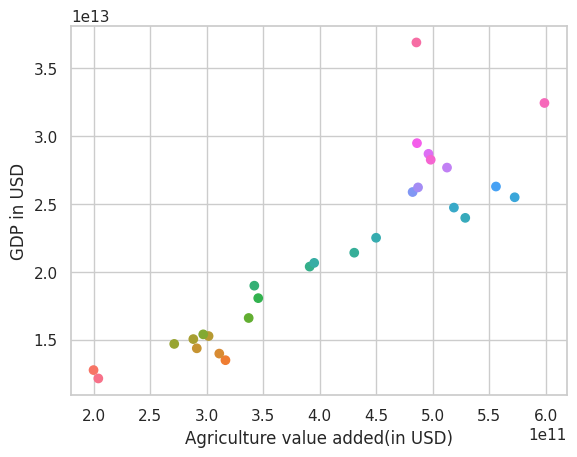

In [34]:
# YOUR CODE HERE
year_total_gdp = cleaned_df.groupby('Year')["GDP in USD"].sum().reset_index()
year_total_agrivalue = cleaned_df.groupby('Year')["Agriculture value added(in USD)"].sum().reset_index()

years = year_total_agrivalue["Year"]

n = len(years)
random_colors = sns.color_palette("husl", n)

years = years.tolist()

colors = []
labels = []

for id, year in enumerate(years):
    colors.append(random_colors[years.index(year)])
    labels.append(year)

plt.scatter(x=year_total_agrivalue['Agriculture value added(in USD)'], y=year_total_gdp['GDP in USD'], color=colors, label=years)

plt.xlabel('Agriculture value added(in USD)')
plt.ylabel('GDP in USD')

plt.show()

As displayed on the scatter plot, there is also a positive correlation between GDP in USD and Agriculture Value Added (in USD)

## Making your own question 04?

**YOUR ANSWER HERE**

As analyzed above, all three columns, GDP in USD, Agriculture Value Added (in USD), and Total Population, have a positive correlation with each other. So, is there multicollinearity occurring here? (The concept of "multicollinearity" refers to a situation in a multiple regression analysis where independent variables (in this case, GDP in USD and Agriculture Value Added) are highly correlated with each other. Multicollinearity can make it challenging to determine the individual impact of each independent variable on the dependent variable in a regression model. It can lead to unstable coefficient estimates and make it difficult to interpret the results.)

### Pre-processing

In [35]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

In [36]:
# YOUR CODE HERE
df = cleaned_df.copy()

df.drop(['Year', 'Country'], inplace=True, axis='columns')

In [37]:
vif_data = pd.DataFrame()

vif_data["feature"] = df.columns

vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]

vif_data.sort_values("VIF", ascending=False)

,feature,VIF
0,Total Population,inf
1,Female Population,inf
2,Male Population,inf
19,Female life expectancy,16.437638
18,Male life expectancy,14.851245
7,Employment in Agriculture(%),14.595650
11,GDP in USD,11.697801
14,Agriculture value added(in USD),9.691389
8,Female Employment in Agriculture(%),7.380543
13,Net income from Abroad,4.808074


Typically:
+ If VIF = 1, there is no multicollinearity (no correlation between the variable and other variables).
+ If VIF < 5, the level of multicollinearity is considered low and acceptable.
+ If VIF $\ge$ 5, there is a high level of multicollinearity, which can make it difficult to determine the individual effects of variables.

Therefore, a high VIF value of indicates a moderate level of multicollinearity that may affect the accuracy of the regression model and should be considered for model adjustments or the removal of unnecessary variables

As there are too many high VIF value, we have to consider removing unnecessary columns sequencely

## Making your own question 05?

**YOUR ANSWER HERE**

Which and how many columns should we remove?

### Pre-processing

We will remove those columns sequencely:
- Male Population
- Female Population
- Employment in Agriculture(%)
- Female life expectancy
- Female Employment in Agriculture(%)
- Female Employment in Industry(%)
- Renewable Energy Consumption (%)
- Birth Rate

In [38]:
# YOUR CODE HERE (OPTION)

def checkVIF(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                              for i in range(len(df.columns))]
    
    vif_data.sort_values("VIF", ascending=False)
    print(vif_data)
    
test_df = df.loc[:, df.columns != 'Male Population']
checkVIF(test_df)

                                       feature           VIF
0                             Total Population  87280.257237
1                            Female Population  86989.386077
2                                   Birth Rate      3.702750
3                                   Death Rate      1.681733
4                    Compulsory Education Dur.      1.522783
5                    Employment in Industry(%)      3.189887
6                 Employment in Agriculture(%)     14.595650
7          Female Employment in Agriculture(%)      7.380543
8             Female Employment in Industry(%)      4.757734
9                              Unemployment(%)      1.417350
10                                  GDP in USD     11.697801
11                  National Income per Capita      1.022707
12                      Net income from Abroad      4.808074
13             Agriculture value added(in USD)      9.691389
14  Electric Power Consumption(kWH per capita)      1.804442
15            Renewable 

In [39]:
test_df = test_df.loc[:, test_df.columns != 'Female Population']
checkVIF(test_df)

                                       feature        VIF
0                             Total Population  10.808435
1                                   Birth Rate   3.697281
2                                   Death Rate   1.618688
3                    Compulsory Education Dur.   1.522603
4                    Employment in Industry(%)   3.189038
5                 Employment in Agriculture(%)  14.299931
6          Female Employment in Agriculture(%)   7.112710
7             Female Employment in Industry(%)   4.757731
8                              Unemployment(%)   1.411061
9                                   GDP in USD  11.253753
10                  National Income per Capita   1.021657
11                      Net income from Abroad   4.663563
12             Agriculture value added(in USD)   9.610947
13  Electric Power Consumption(kWH per capita)   1.746143
14            Renewable Energy Consumption (%)   2.811865
15                 Fossil Fuel Consumption (%)   1.418286
16            

In [40]:
test_df = test_df.loc[:, test_df.columns != 'Employment in Agriculture(%)']
checkVIF(test_df)

                                       feature        VIF
0                             Total Population  10.715253
1                                   Birth Rate   3.537448
2                                   Death Rate   1.584232
3                    Compulsory Education Dur.   1.484534
4                    Employment in Industry(%)   2.416960
5          Female Employment in Agriculture(%)   2.232692
6             Female Employment in Industry(%)   2.634550
7                              Unemployment(%)   1.409428
8                                   GDP in USD  11.250360
9                   National Income per Capita   1.020859
10                      Net income from Abroad   4.633888
11             Agriculture value added(in USD)   9.603079
12  Electric Power Consumption(kWH per capita)   1.727197
13            Renewable Energy Consumption (%)   2.526253
14                 Fossil Fuel Consumption (%)   1.413532
15                        Male life expectancy  14.260868
16            

In [41]:
test_df = test_df.loc[:, test_df.columns != 'Female life expectancy ']
checkVIF(test_df)

                                       feature        VIF
0                             Total Population  10.686791
1                                   Birth Rate   3.445820
2                                   Death Rate   1.583699
3                    Compulsory Education Dur.   1.358924
4                    Employment in Industry(%)   2.392885
5          Female Employment in Agriculture(%)   1.975424
6             Female Employment in Industry(%)   2.630394
7                              Unemployment(%)   1.400148
8                                   GDP in USD  11.250299
9                   National Income per Capita   1.019044
10                      Net income from Abroad   4.633717
11             Agriculture value added(in USD)   9.552141
12  Electric Power Consumption(kWH per capita)   1.707748
13            Renewable Energy Consumption (%)   2.461636
14                 Fossil Fuel Consumption (%)   1.408696
15                        Male life expectancy   2.888996
16            

In [42]:
test_df = test_df.loc[:, test_df.columns != 'Female Employment in Agriculture(%)']
checkVIF(test_df)

                                       feature        VIF
0                             Total Population  10.677857
1                                   Birth Rate   3.338356
2                                   Death Rate   1.560461
3                    Compulsory Education Dur.   1.355109
4                    Employment in Industry(%)   2.231397
5             Female Employment in Industry(%)   2.599009
6                              Unemployment(%)   1.275478
7                                   GDP in USD  11.207392
8                   National Income per Capita   1.018729
9                       Net income from Abroad   4.624930
10             Agriculture value added(in USD)   9.547679
11  Electric Power Consumption(kWH per capita)   1.700993
12            Renewable Energy Consumption (%)   2.405808
13                 Fossil Fuel Consumption (%)   1.398129
14                        Male life expectancy   2.786402
15                  School enrollment, primary   1.206349
16            

In [43]:
test_df = test_df.loc[:, test_df.columns != 'Female Employment in Industry(%)']
checkVIF(test_df)

                                       feature        VIF
0                             Total Population  10.643378
1                                   Birth Rate   3.254670
2                                   Death Rate   1.560333
3                    Compulsory Education Dur.   1.277312
4                    Employment in Industry(%)   1.259033
5                              Unemployment(%)   1.225615
6                                   GDP in USD  11.206885
7                   National Income per Capita   1.017065
8                       Net income from Abroad   4.624789
9              Agriculture value added(in USD)   9.502790
10  Electric Power Consumption(kWH per capita)   1.635665
11            Renewable Energy Consumption (%)   2.250600
12                 Fossil Fuel Consumption (%)   1.394804
13                        Male life expectancy   2.731570
14                  School enrollment, primary   1.195702
15                 School enrollment, tertiary   1.420837
16            

In [44]:
test_df = test_df.loc[:, test_df.columns != 'Renewable Energy Consumption (%)']
checkVIF(test_df)

                                       feature        VIF
0                             Total Population  10.460993
1                                   Birth Rate   2.411666
2                                   Death Rate   1.539375
3                    Compulsory Education Dur.   1.222295
4                    Employment in Industry(%)   1.200720
5                              Unemployment(%)   1.197240
6                                   GDP in USD  11.045264
7                   National Income per Capita   1.015554
8                       Net income from Abroad   4.613695
9              Agriculture value added(in USD)   9.476562
10  Electric Power Consumption(kWH per capita)   1.635187
11                 Fossil Fuel Consumption (%)   1.207288
12                        Male life expectancy   2.679954
13                  School enrollment, primary   1.193163
14                 School enrollment, tertiary   1.414951
15                     Primary completion rate   1.328193
16            

In [45]:
test_df = test_df.loc[:, test_df.columns != 'Birth Rate']
checkVIF(test_df)

                                       feature        VIF
0                             Total Population  10.417592
1                                   Death Rate   1.310451
2                    Compulsory Education Dur.   1.222248
3                    Employment in Industry(%)   1.200627
4                              Unemployment(%)   1.145555
5                                   GDP in USD  11.043987
6                   National Income per Capita   1.014958
7                       Net income from Abroad   4.580399
8              Agriculture value added(in USD)   9.405888
9   Electric Power Consumption(kWH per capita)   1.626229
10                 Fossil Fuel Consumption (%)   1.201311
11                        Male life expectancy   1.706543
12                  School enrollment, primary   1.101110
13                 School enrollment, tertiary   1.414237
14                     Primary completion rate   1.284409
15                               Literacy rate   0.196849


### Analyzing to get the answer

In [51]:
# YOUR CODE HERE
df = test_df

df["Year"] = cleaned_df["Year"]

vif_data = pd.DataFrame()

vif_data["feature"] = df.columns

vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]

vif_data.sort_values("VIF", ascending=False)

studentID = 21127503
your_continent = "americas"
save_name = "_".join([str(studentID), str(your_continent)]) + "_eda.csv"
df.to_csv("../data/processed/" + save_name, index=False)

## Making your own question 06?

**YOUR ANSWER HERE**

After removing unnecessary columns, Total Population has a relatively strong correlation with which columns?

### Pre-processing

In [47]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

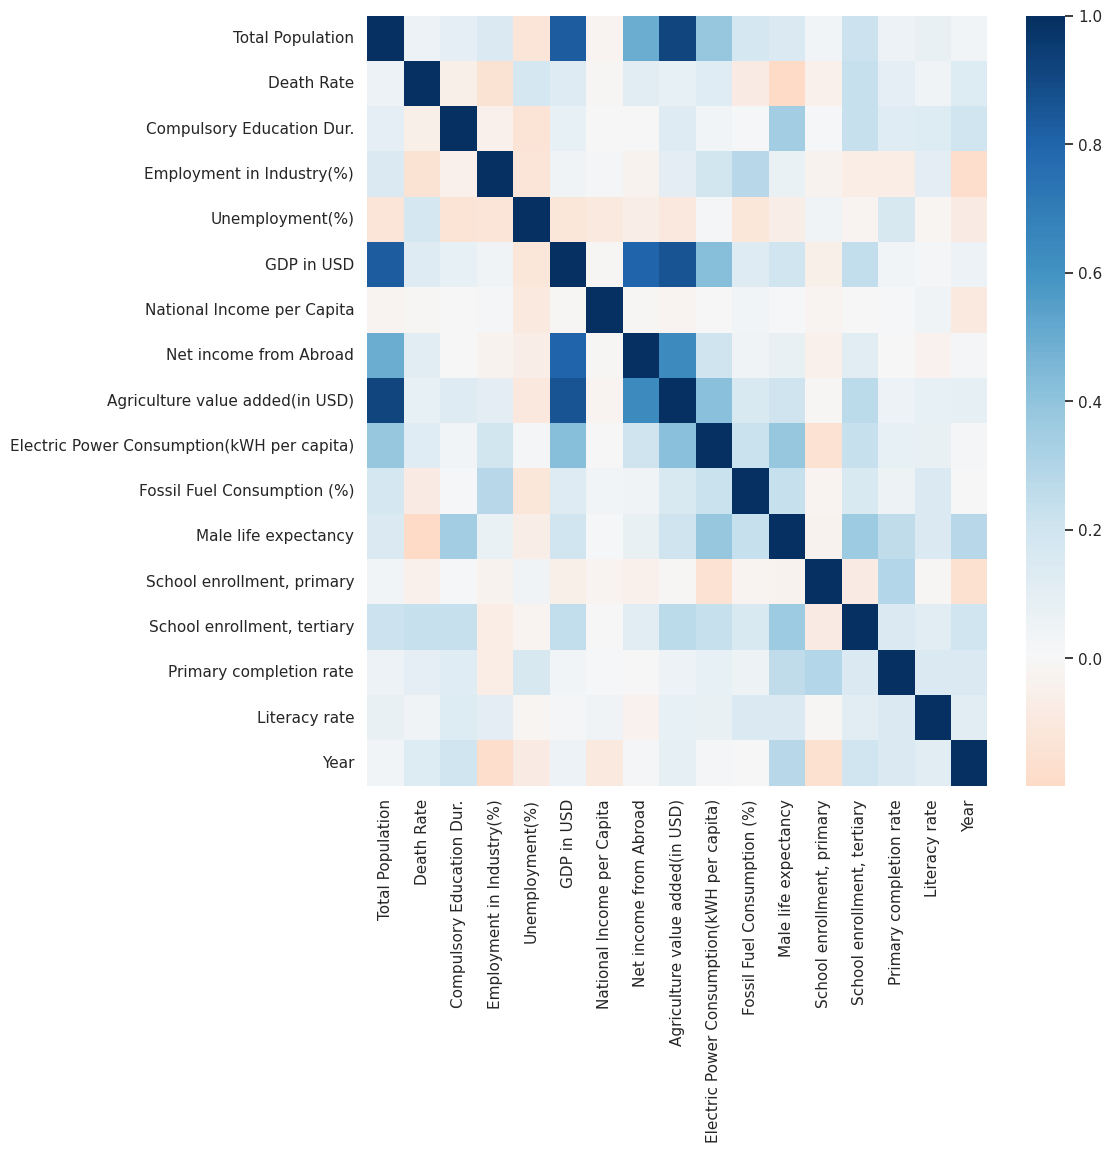

In [48]:
# YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

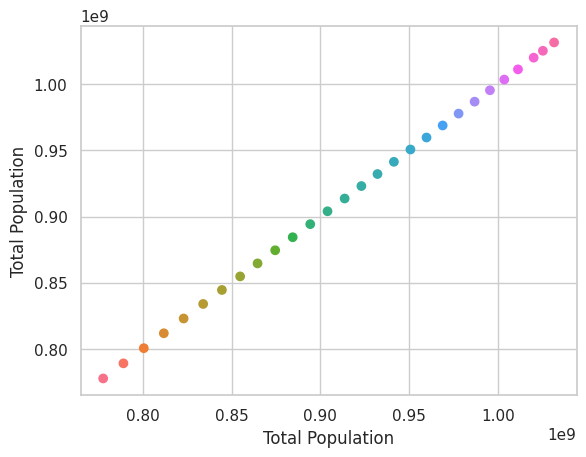

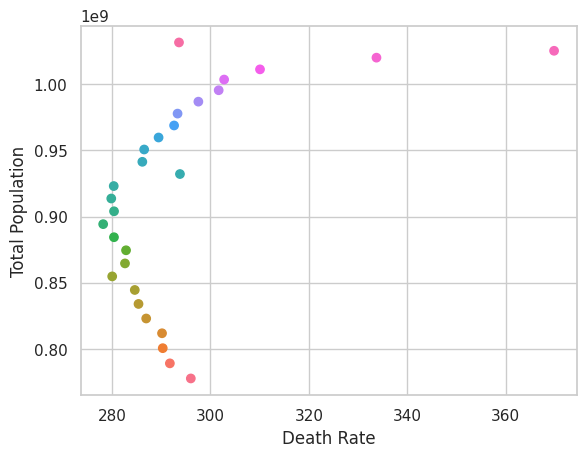

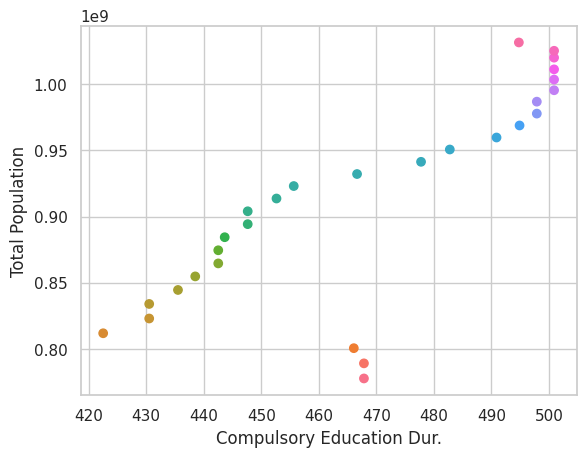

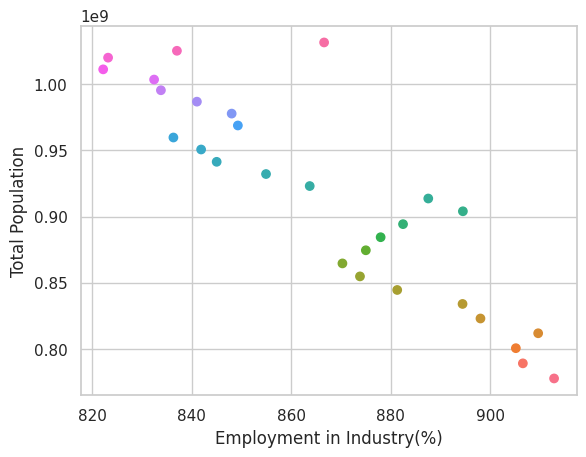

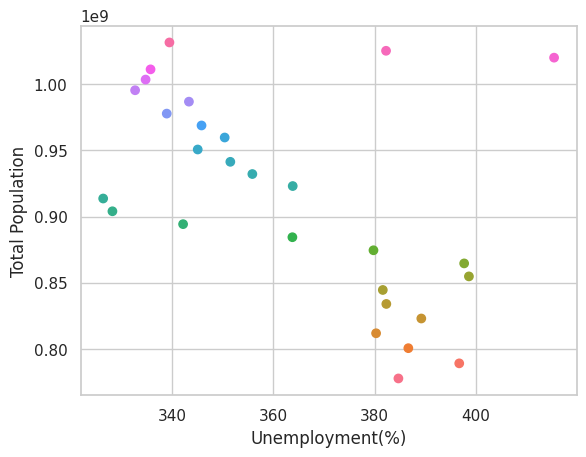

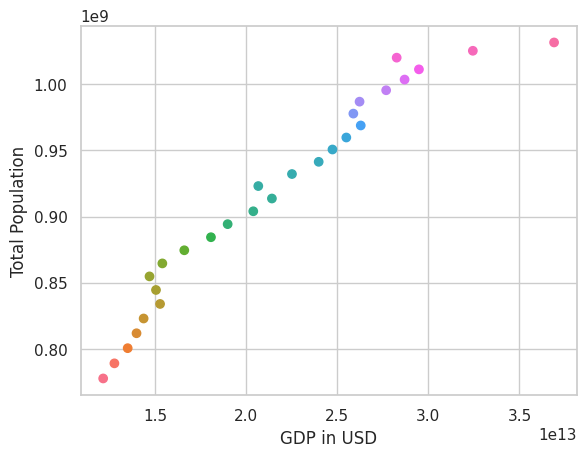

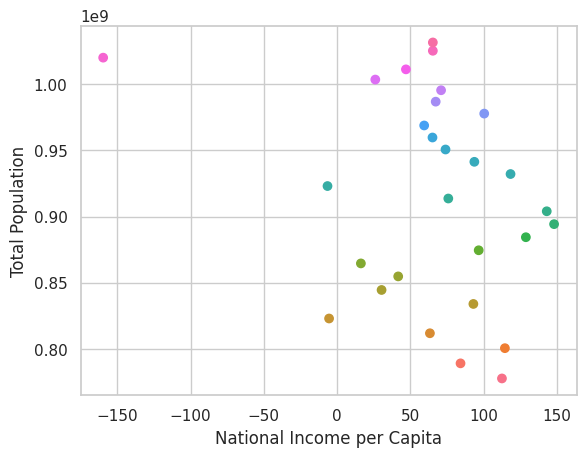

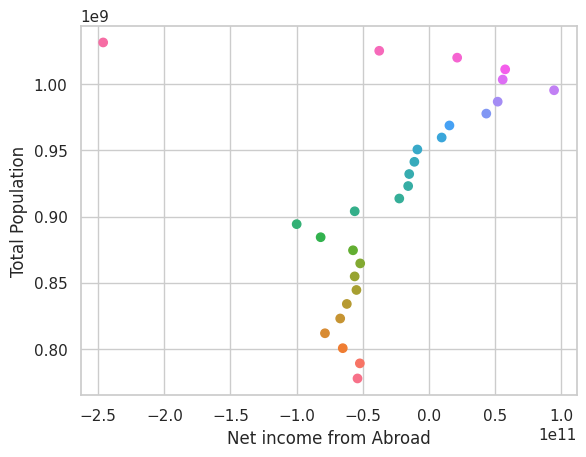

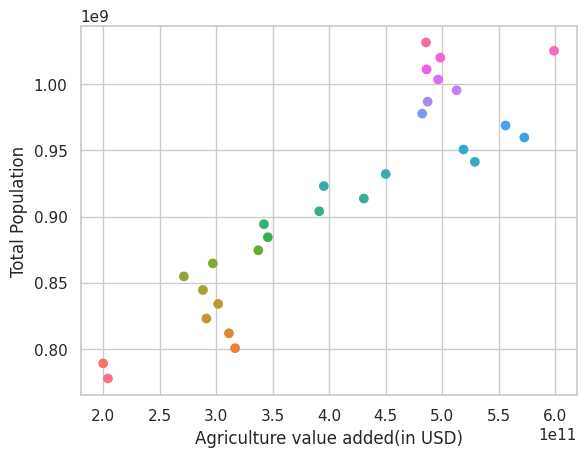

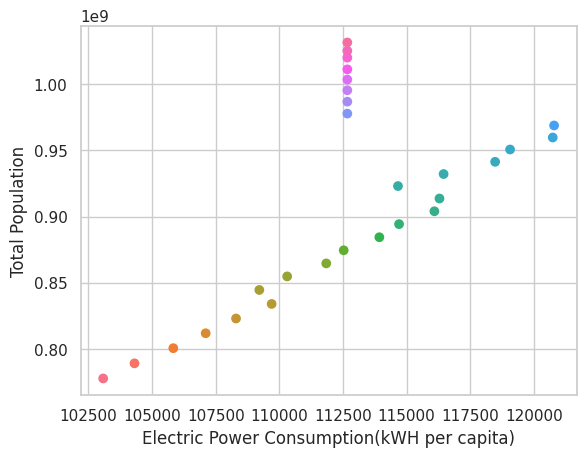

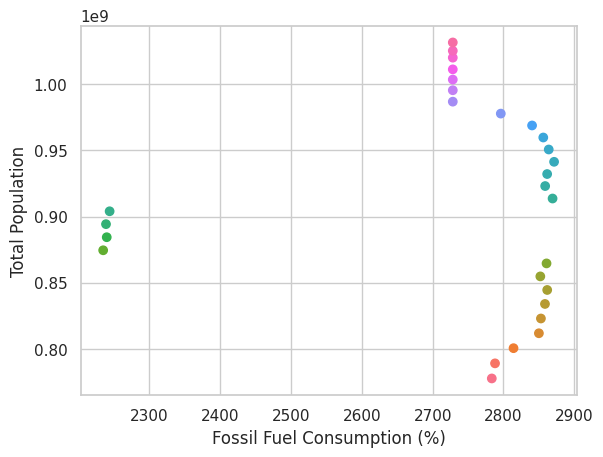

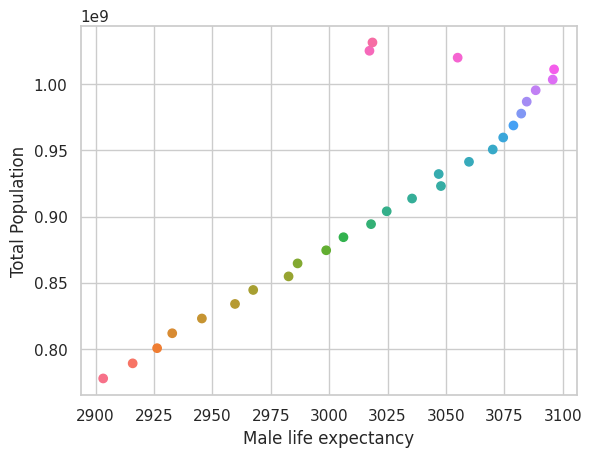

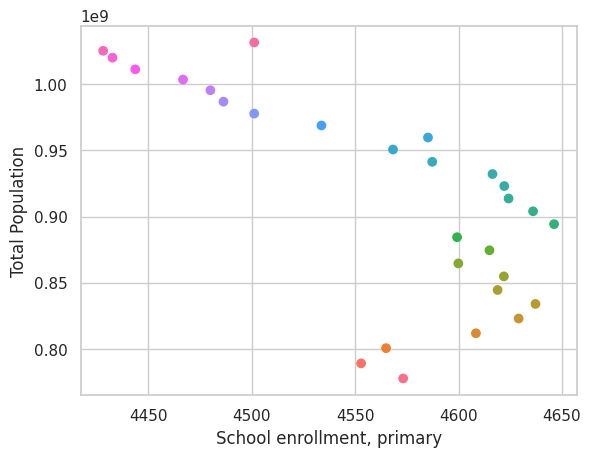

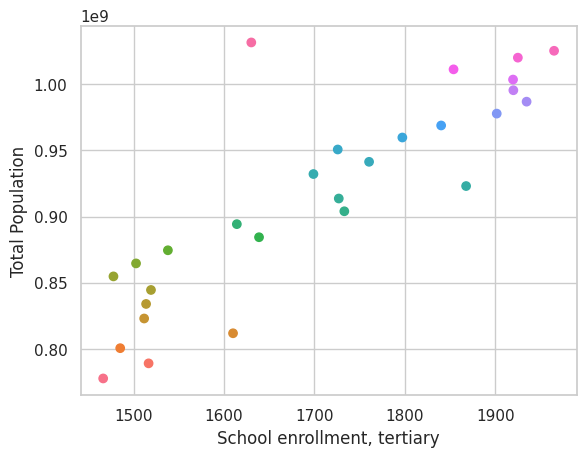

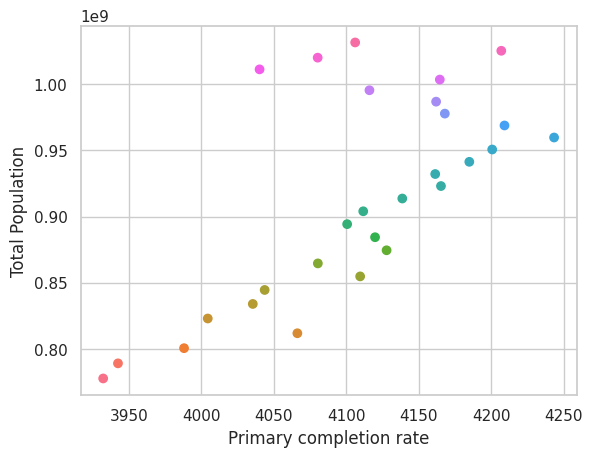

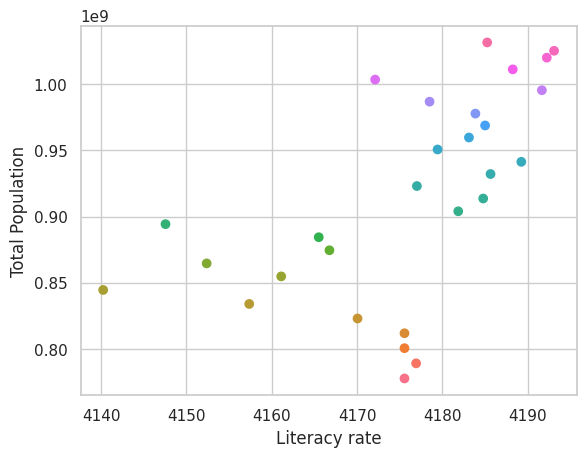

In [49]:
year_total_population = df.groupby('Year')["Total Population"].sum().reset_index()

tmp = df.loc[:, test_df.columns != 'Year']

for col in tmp:
    year_total = df.groupby('Year')[col].sum().reset_index()
    years = year_total["Year"]

    n = len(years)
    random_colors = sns.color_palette("husl", n)

    years = years.tolist()

    colors = []
    labels = []

    for id, year in enumerate(years):
        colors.append(random_colors[years.index(year)])
        labels.append(year)

    plt.scatter(x=year_total[col], y=year_total_population["Total Population"], color=colors, label=years)

    plt.xlabel(col)
    plt.ylabel("Total Population")

    plt.show()

From scatter plots, Total Population has a relatively strong correlation with GDP in USD, Electric Power Consumption(kWH per capita), Agriculture value added(in USD)